In [13]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [7]:
analyte1 = pd.read_csv('data/unsampled/Unsampled_Analyte1.csv').drop(['CFU/mL'], axis=1)
analyte2 = pd.read_csv('data/unsampled/Unsampled_Analyte2.csv').drop(['CFU/mL'], axis=1)
analyte3 = pd.read_csv('data/unsampled/Unsampled_Analyte3.csv').drop(['CFU/mL'], axis=1)

mix_111_sensor1 = pd.read_excel('data/time_data/ratio_111/Sensor 1_111.xlsx')
mix_111_sensor2 = pd.read_excel('data/time_data/ratio_111/Sensor 2_111.xlsx')
mix_111_sensor3 = pd.read_excel('data/time_data/ratio_111/Sensor 3_111.xlsx')

mix_111 = pd.DataFrame()
mix_111['Dilution'] = mix_111_sensor1['Dilutions']
mix_111['Sensor1'] = mix_111_sensor1['Voltage sensor1_111']
mix_111['Sensor2'] = mix_111_sensor2['Voltage_sensor2_111']
mix_111['Sensor3'] = mix_111_sensor3['Voltage _sensor3_111']
mix_111['Label'] = ['Mix' for i in range(len(mix_111))]

In [8]:
analyte1['Dilution'] = mix_111['Dilution']
analyte1['Label'] = ['A1' for i in range(len(analyte1))]

analyte2['Dilution'] = mix_111['Dilution'] 
analyte2['Label'] = ['A2' for i in range(len(analyte2))]

analyte3['Dilution'] = mix_111['Dilution']
analyte3['Label'] = ['A3' for i in range(len(analyte3))]

total_data = pd.concat([analyte1, analyte2, analyte3, mix_111], axis=0)
total_data = total_data[['Sensor1', 'Sensor2', 'Sensor3', 'Dilution', 'Label']]

total_data.to_csv('data/mixture/total_data.csv', index=False)
total_data.to_excel('data/mixture/total_data.xlsx', index=False)

del analyte1, analyte2, analyte3, mix_111, mix_111_sensor1, mix_111_sensor2, mix_111_sensor3

### PCA

In [9]:
total_data = total_data.drop(['Dilution'], axis=1)
labels = total_data['Label']
labels = labels.map({'Mix': 0, 'A1': 1, 'A2': 2, 'A3': 3})

total_data.head()

,Sensor1,Sensor2,Sensor3,Label
0,-68.02,70.734,52.47,A1
1,-95.70,50.162,32.63,A1
2,-99.96,-8.390,-10.41,A1
3,-107.42,-18.700,-23.93,A1
4,-109.94,-19.620,-27.24,A1


In [10]:
X = total_data[['Sensor1','Sensor2','Sensor3']]
Y = total_data['Label'].map({'Mix': 0, 'A1': 1, 'A2': 2, 'A3': 3})

pca  = PCA(n_components=2)
pca.fit(X)
pca_data = pca.transform(X)
pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

X_train, X_test, Y_train, Y_test = train_test_split(pca_data, Y, test_size=0.2, random_state=42)

pca_data.head()

,PC1,PC2
0,-49.745351,70.772565
1,-83.277698,49.915752
2,-103.573422,-18.761438
3,-115.189003,-33.220213
4,-118.572390,-35.476850


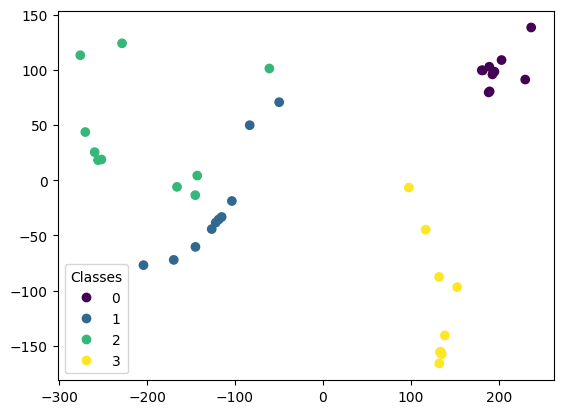

In [11]:
scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=labels, cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

### SVM

Training accuracy =  0.90625
Testing accuracy =  0.875


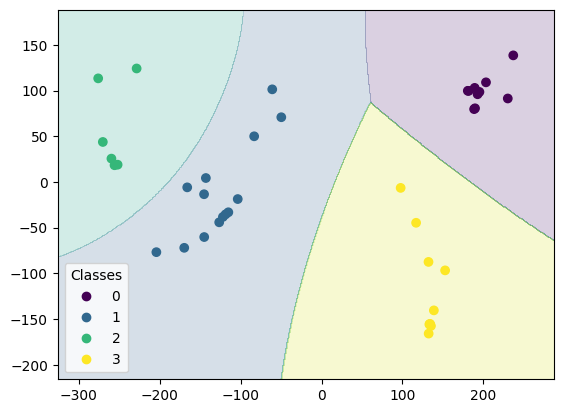

In [14]:
svm = SVC(kernel='rbf')
svm.fit(X_train, Y_train)

print('Training accuracy = ', svm.score(X_train, Y_train))

pred = svm.predict(X_test)
print('Testing accuracy = ', accuracy_score(Y_test, pred))


predictions = svm.predict(pca_data)

x_min, x_max = pca_data['PC1'].min() - 50, pca_data['PC1'].max() + 50
y_min, y_max = pca_data['PC2'].min() - 50, pca_data['PC2'].max() + 50
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = svm.predict(np.c_[xx.ravel().astype(float), yy.ravel().astype(float)])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=predictions, cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

### Random Forest

Training accuracy =  1.0
Testing accuracy =  0.875


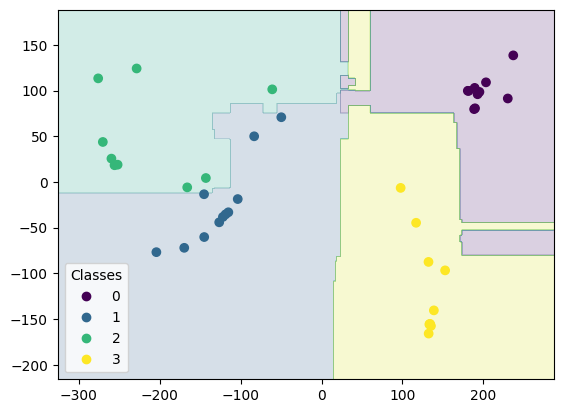

In [15]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

print('Training accuracy = ', rfc.score(X_train, Y_train))

pred = rfc.predict(X_test)
print('Testing accuracy = ', accuracy_score(Y_test, pred))


predictions = rfc.predict(pca_data)

x_min, x_max = pca_data['PC1'].min() - 50, pca_data['PC1'].max() + 50
y_min, y_max = pca_data['PC2'].min() - 50, pca_data['PC2'].max() + 50
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = rfc.predict(np.c_[xx.ravel().astype(float), yy.ravel().astype(float)])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
scatter = plt.scatter(pca_data['PC1'], pca_data['PC2'], c=predictions, cmap='viridis')
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()